### Matplotlib

Matplotlib is known for the high amount of flexibility it provides as a 2-D plotting library in Python. If you have a MATLAB programming background, you’ll find the Pyplot interface of Matplotlib very familiar. You’ll be off with your first visualization in no time at all!

Unique features of Matplotlib
Matplotlib can be used in multiple ways in Python, including Python scripts, the Python and iPython shells, Jupyter Notebooks and what not! This is why it’s often used to create visualizations not just by Data Scientists but also by researchers to create graphs that are of publication quality.

Matplotlib supports all the popular charts (lots, histograms, power spectra, bar charts, error charts, scatterplots, etc.) right out of the box. There are also extensions that you can use to create advanced visualizations like 3-Dimensional plots, etc.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


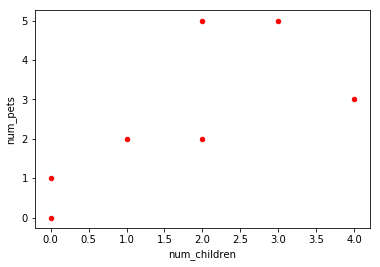

In [5]:
#Plot two columns as scatter plot
df.plot(kind = 'scatter', x='num_children', y='num_pets', color = 'red')
plt.show()

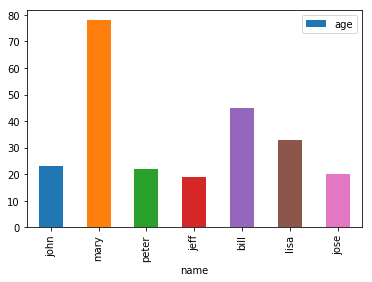

In [6]:
#plot column values as bar plot
df.plot(kind = 'bar', x= 'name', y = 'age')

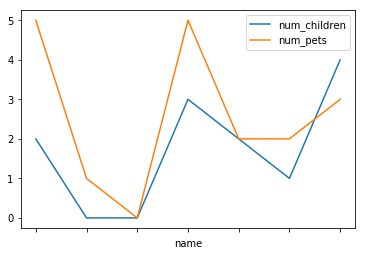

In [8]:
### Line plot for multiple columns
df.plot(kind = 'line', x='name', y='num_children', ax =plt.gca())
df.plot(kind='line', x='name', y='num_pets', ax=plt.gca())
plt.show()

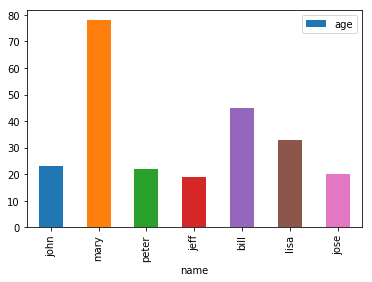

In [10]:
#Save plot to a file
df.plot(kind='bar', x='name', y='age')
plt.savefig('output.png')

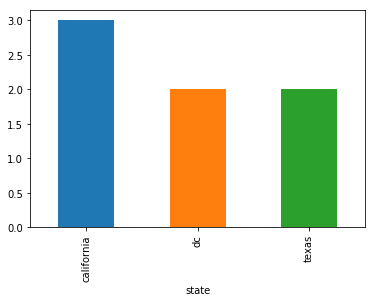

In [16]:
#Bar plot with group by
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

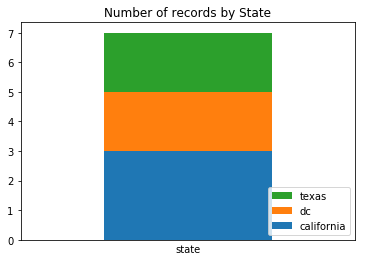

In [18]:
#Stacked bar plot with group by

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
df
plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

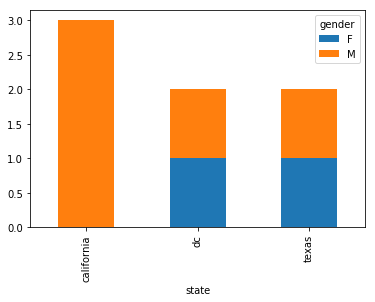

In [19]:
#Stacked bar plot with two-level group by
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

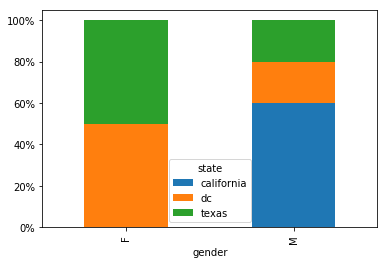

In [21]:
# Stacked bar plot with two-level group by, normalized to 100%

import matplotlib.ticker as mtick

df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

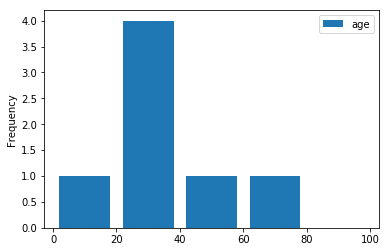

In [22]:
#Histogram of column values

df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()